
# Video Game Sales (Analysis)

<img src="https://images.unsplash.com/photo-1612287230202-1ff1d85d1bdf?ixlib=rb-1.2.1&ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&auto=format&fit=crop&w=1471&q=80" style="margin: 10 auto; width: 100%; max-width: 950px;"/>

## Fields

- Rank - Ranking of overall sales
- Name - The games name
- Platform - Platform of the games release (i.e. PC,PS4, etc.)
- Year - Year of the game's release
- Genre - Genre of the game
- Publisher - Publisher of the game
- NA_Sales - Sales in North America (in millions)
- EU_Sales - Sales in Europe (in millions)
- JP_Sales - Sales in Japan (in millions)
- Other_Sales - Sales in the rest of the world (in millions)
- Global_Sales - Total worldwide sales.


## Credits
- [Database Link](https://www.kaggle.com/gregorut/videogamesales)
- [Database Author](https://www.kaggle.com/gregorut)
- [License](https://github.com/GregorUT/vgchartzScrape/blob/master/LICENSE)

# Questions

- Which platform sold the most?
- Which publisher had the most sales and in which genre did it sell the most?
- What was the most successful game?




# Libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data Extraction

In [8]:
videogames_df = pd.read_csv("Dataset/vgsales.csv")
videogames_df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


# Data Cleaning

In [9]:
videogames_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [10]:
videogames_df.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [11]:
videogames_df.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [12]:
videogames_df = videogames_df.dropna()

In [13]:
videogames_df.isnull().sum()

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

In [14]:
videogames_df.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000
mean,8290.190228,2006.405561,0.265647,0.147731,0.078833,0.048426,0.540910
std,4792.654450,5.832412,0.822432,0.509303,0.311879,0.190083,1.567345
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4132.500000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8292.000000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12439.500000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.480000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [15]:
videogames_df.Year = videogames_df.Year.astype(int)

C:\Users\hlibe\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


# Analisys

In [16]:
publisher_salesDF = videogames_df.groupby('Publisher')[['NA_Sales','EU_Sales','JP_Sales','Other_Sales','Global_Sales']].sum()
publisher_salesDF

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Publisher,,,,,
10TACLE Studios,0.07,0.04,0.00,0.00,0.11
1C Company,0.01,0.07,0.00,0.02,0.10
20th Century Fox Video Games,1.82,0.10,0.00,0.01,1.94
2D Boy,0.00,0.03,0.00,0.01,0.04
3DO,6.48,3.04,0.00,0.63,10.12
...,...,...,...,...,...
id Software,0.02,0.00,0.00,0.00,0.03
imageepoch Inc.,0.00,0.00,0.04,0.00,0.04
inXile Entertainment,0.02,0.06,0.00,0.01,0.10


In [17]:
publisher_salesDF.max()

NA_Sales         815.75
EU_Sales         418.30
JP_Sales         454.99
Other_Sales      127.63
Global_Sales    1784.43
dtype: float64

In [18]:
publisher_salesDF.min()

NA_Sales        0.00
EU_Sales        0.00
JP_Sales        0.00
Other_Sales     0.00
Global_Sales    0.01
dtype: float64

## Which publisher had the most sales and in which genre did it sell the most?





In [19]:
# Find which publisher earned the most

publisher_salesDF[publisher_salesDF['Global_Sales'] == publisher_salesDF['Global_Sales'].max()]

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Publisher,,,,,
Nintendo,815.75,418.3,454.99,95.19,1784.43


In [20]:
nintendo_salesDF = videogames_df[videogames_df['Publisher'] == 'Nintendo']
nintendo_salesDF

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16269,16272,Slide Adventure: Mag Kid,DS,2007,Action,Nintendo,0.00,0.00,0.01,0.00,0.01
16357,16360,Mario vs. Donkey Kong: Tipping Stars,WiiU,2015,Puzzle,Nintendo,0.00,0.00,0.01,0.00,0.01
16456,16459,Art Academy: Home Studio,WiiU,2015,Misc,Nintendo,0.00,0.00,0.01,0.00,0.01
16473,16476,Captain Rainbow,Wii,2008,Adventure,Nintendo,0.00,0.00,0.01,0.00,0.01


In [21]:
globalSales_genre = nintendo_salesDF.groupby('Genre')[['Global_Sales']].sum()
globalSales_genre

,Global_Sales
Genre,
Action,128.10
Adventure,35.71
Fighting,53.35
Misc,180.67
Platform,426.18
Puzzle,124.88
Racing,151.30
Role-Playing,284.57
Shooter,69.69


In [22]:
genre = ['Action','Adventure','Fighting','Misc','Platform','Puzzle','Racing','Role-Playing','Shooter','Simulation','Sports','Strategy']

Text(0, 0.5, 'Genre')

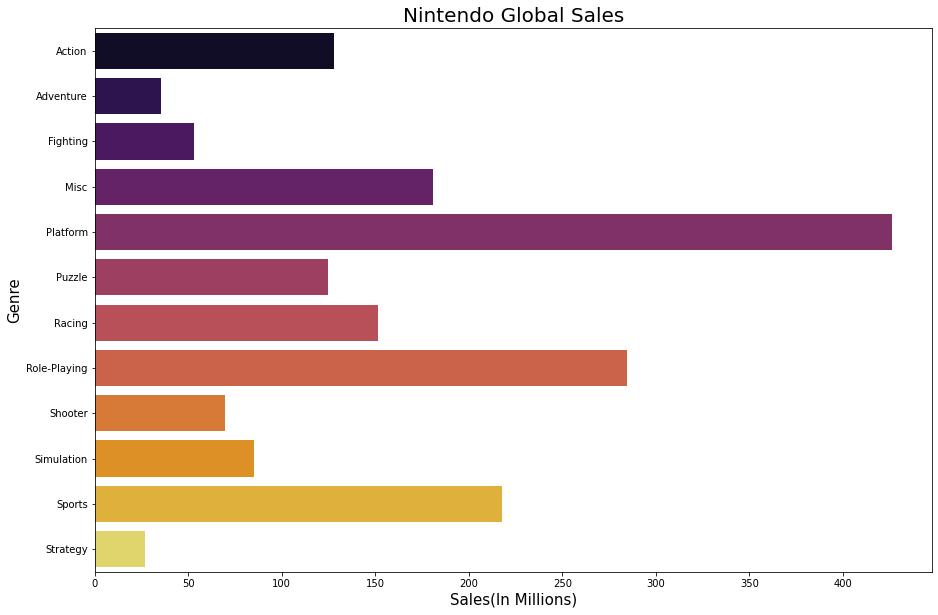

In [23]:
plt.figure(figsize=(15,10))
sns.barplot(x = globalSales_genre['Global_Sales'], y = genre, palette='inferno')
sns.color_palette("rocket")
plt.title("Nintendo Global Sales", size = 20)
plt.xlabel("Sales(In Millions)",size = 15)
plt.ylabel("Genre", size = 15)

## What was the most successful game?

In [24]:
names_games = videogames_df.groupby(['Name','Year','Publisher','Genre'])[['Global_Sales']].sum()
names_games

,,,,Global_Sales
Name,Year,Publisher,Genre,
'98 Koshien,1998,Magical Company,Sports,0.41
.hack//G.U. Vol.1//Rebirth,2006,Namco Bandai Games,Role-Playing,0.17
.hack//G.U. Vol.2//Reminisce,2006,Namco Bandai Games,Role-Playing,0.23
.hack//G.U. Vol.2//Reminisce (jp sales),2006,Namco Bandai Games,Role-Playing,0.16
.hack//G.U. Vol.3//Redemption,2007,Namco Bandai Games,Role-Playing,0.17
...,...,...,...,...
thinkSMART FAMILY!,2010,Conspiracy Entertainment,Misc,0.03
thinkSMART: Chess for Kids,2011,Mentor Interactive,Misc,0.01
uDraw Studio,2010,THQ,Misc,2.46


In [25]:
names_games.max()

Global_Sales    82.74
dtype: float64

In [26]:
names_games.min()

Global_Sales    0.01
dtype: float64

In [27]:
names_games[names_games['Global_Sales'] == names_games['Global_Sales'].max()]

,,,,Global_Sales
Name,Year,Publisher,Genre,
Wii Sports,2006,Nintendo,Sports,82.74


## Which platform sold the most?

In [28]:
platform_sales = videogames_df.groupby('Platform')[['Global_Sales']].sum()
platform_sales

,Global_Sales
Platform,
2600,86.57
3DO,0.10
3DS,246.27
DC,15.97
DS,818.91
GB,254.42
GBA,305.62
GC,197.14
GEN,28.36


In [29]:
platforms=['2600','3DO','3DS','DC','DS','GB','GBA','GC','GEN','GG','N64','NES','NG','PC','PCFX','PS','PS2','PS3','PS4','PSP','PSV','SAT','SCD','SNES','TG16','WS','Wii','WiiU','X360','XB','XOne']

Text(0, 0.5, 'Platform')

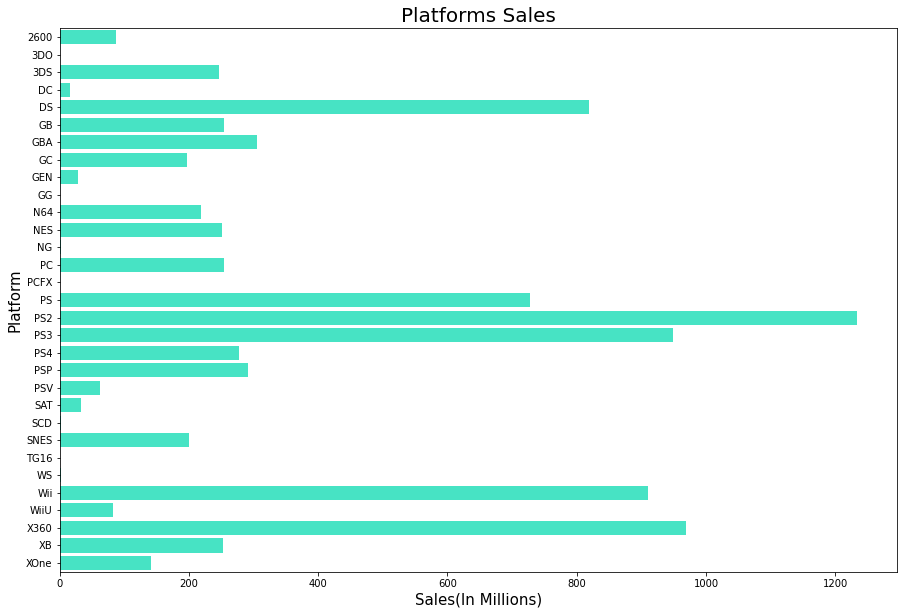

In [30]:
#create bar chart
plt.figure(figsize=(15,10))
sns.barplot(x = platform_sales['Global_Sales'], y = platforms, color='#2dfdd4')
plt.title("Platforms Sales", size = 20)
plt.xlabel("Sales(In Millions)",size = 15)
plt.ylabel("Platform", size = 15)

# Conclusions

- Nintendo has had the biggest success in the world of platform games, making its biggest profit compared to the other genres
- PS2 and XBOX360 were the best-selling consoles of all time
- Wii Sports had the biggest single success in 2006